In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ambiance import Atmosphere

In [3]:
rhof = lambda h: Atmosphere(h).density[0]
presf = lambda h: Atmosphere(h).pressure[0] / 1e3
tempf = lambda h: Atmosphere(h).temperature[0]
print(rhof(0))


def update_state(state, dt,
                 m=40,
                 g=9.81,
                 A=16.13e-3,
                ):
    pos, vel, accel, pres, temp,Cd = state

    accel_drag = 0.5*Cd*A*vel**2*rhof(pos) / m
    pos_new = pos + vel*dt
    vel_new = vel + accel*dt
    accel_new = - g - accel_drag

    

    return [pos_new,vel_new,accel_new,presf(pos_new),tempf(pos_new),Cd]

1.225000018124288


In [13]:
dt = 0.01
time = 30
state = np.array([100,340,0,0,0,0.0025])
states = []

for i in range(0,int(time/dt)):
    state = update_state(state,dt)
    states.append(state)

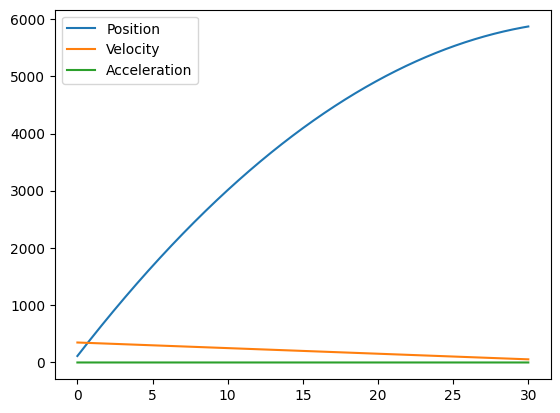

In [14]:

time = np.linspace(0, time, int(time/dt))
pos = [state[0] for state in states]
vel = [state[1] for state in states]
accel = [state[2] for state in states]

plt.plot(time,pos, label = "Position")
plt.plot(time,vel, label = "Velocity")
plt.plot(time,accel, label = "Acceleration")
plt.legend()
plt.show()

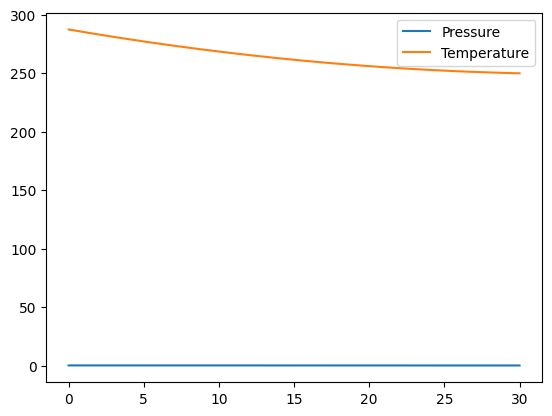

In [15]:
pres = [state[3]/1e3 for state in states]
temp = [state[4] for state in states]

plt.plot(time,pres,label="Pressure")
plt.plot(time,temp,label="Temperature")
plt.legend()
plt.show()

[[ 2.88686902e+06 -1.41925968e+05  3.28547405e+01 -2.51228195e+04
  -1.87452062e+04 -1.47606160e-28]
 [-1.41925968e+05  7.24812588e+03 -1.57692268e+00  1.21805033e+03
   9.21524073e+02 -3.22888476e-29]
 [ 3.28547405e+01 -1.57692268e+00  3.80571001e-04 -2.88860294e-01
  -2.13341147e-01  1.39190367e-30]
 [-2.51228195e+04  1.21805033e+03 -2.88860294e-01  2.19931581e+02
   1.63132052e+02  9.79355426e-30]
 [-1.87452062e+04  9.21524073e+02 -2.13341147e-01  1.63132052e+02
   1.21717602e+02  4.88351985e-29]
 [-1.47606160e-28 -3.22888476e-29  1.39190367e-30  9.79355426e-30
   4.88351985e-29  2.47912582e-32]]


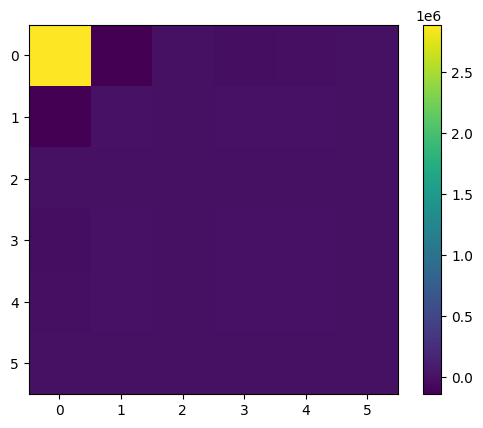

In [16]:
covariance = np.cov(np.array(states).T)
plt.imshow(covariance)
plt.colorbar()
print(covariance)

# Part 2: Doing the actual filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

import sys
sys.path.append("..")

from src.PredictorProvider import UnscentedPredictorProvider
from src.CorrectorProvider import LinearCorrectorProvider, UnscentedCorrectorProvider 

In [2]:
class UnscentedStatePredictor(UnscentedPredictorProvider):
    def point_prop(self, state, dt):
        updated_state = update_state(state,dt)
        return np.array(updated_state)

class UnscentedAccelCorrector(UnscentedCorrectorProvider):
    def obs_pred(self, state):
        return 